Project 4

The solution to this project should be in one single Jupyter notebook.

• The notebook should run as a program.

All cells should execute correctly in the order in which they appear.

• For each assignment, use a separate header in the notebook.

• Use text cells to answer the questions of the assignments.

• Write complete, grammatically correct sentences to answer the questions.

Explanations matter just as much as the numerical results and the code.

Submit your project before the deadline to gradescope.

The name of your notebook should be FirstNameLastName where you replace FirstName and Lastname by your own first 
and last name.

The first cell in your solution notebook should be a text cell that lists your name.

If you have questions about the project, you are welcome in the office hours.

Assignment 1

Consider the initial value problem
$$
y'=\frac{t-y}{2}   \ \text{ on }  \ [0,3] \ \text{ with }  \  y(0)=1.
$$
The exact solution is $y(t) = 3 e^{-t/2} -2 +t$. Use Euler's method with $h=1, 1/2, 1/4$ and $1/8$ to approximate 
$y(t)$. Graph and label the approximations and the exact solution on the same graph.


   Resolving package versions...
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Manifest.toml`


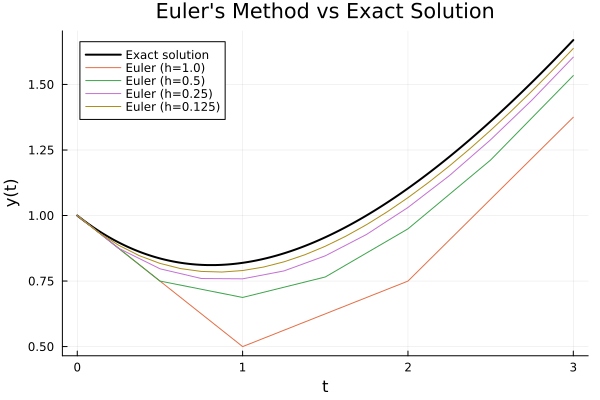

In [29]:
using Pkg; Pkg.add("Plots")
using Plots

# Define the differential equation dy/dt = (t - y) / 2
f(t, y) = (t - y) / 2

# Exact solution
exact_solution(t) = 3 * exp(-t / 2) - 2 + t

# Euler's method function
function eulermethod(f, a, b, u0, n)
    h = (b - a) / n
    t = range(a, b, length = n + 1)  # Create time steps
    u = zeros(n + 1)  # Initialize solution array
    u[1] = u0
    for i in 1:n
        u[i + 1] = u[i] + f(t[i], u[i]) * h
    end
    return t, u
end

# Interval and initial condition
a = 0.0
b = 3.0
u0 = 1.0

# Step sizes
step_sizes = [1, 0.5, 0.25, 0.125]

# Plot the exact solution
t_exact = 0:0.01:3
y_exact_vals = exact_solution.(t_exact)
combined_plot = plot(t_exact, y_exact_vals, label="Exact solution", color=:black, lw=2, xlabel="t", ylabel="y(t)", title="Euler's Method vs Exact Solution")

# Add Euler's method approximations for each step size
for h in step_sizes
    n = Int((b - a) / h)  # Number of steps
    t, u = eulermethod(f, a, b, u0, n)
    plot!(combined_plot, t, u, label="Euler (h=$h)")
end

# Display the combined plot
display(combined_plot)


Assignment 2

The trapezoidal method is an implicit method
$$
w_{i+1} = w_i + \frac{h}{2}\bigg( f(t_i, w_i) + f(t_{i+1},w_{i+1})\bigg).
$$
It can be combined with an explicit method such as Euler's method
$$
w_{i+1} = w_i + h f(t_i,w_i),    
$$    
to get a new better method
$$
w_{i+1} = w_i + \frac{h}{2}\bigg( f(t_i, w_i) + f(t_{i+1}, w_i + h f(t_i,w_i))\bigg).    
$$    
One says that Euler's method is used to predict the value of $w_{i+1}$, which is then used in the implicit method. 
This is called a predictor-corrector method.
        
Combine the Adams-Bashforth Four-Step Method (See Sauer formula (6.88)) 
and the Adams–Moulton Three-Step Method (See Sauer formula (6.95)) in a predictor-corrector method. Use step size 0.05. 
Plot the approximation and the correct solution of IVP 
$$
y' = t y + t^3; y(0)=1,         
$$        
on the interval [0, 5].   


   Resolving package versions...
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Manifest.toml`


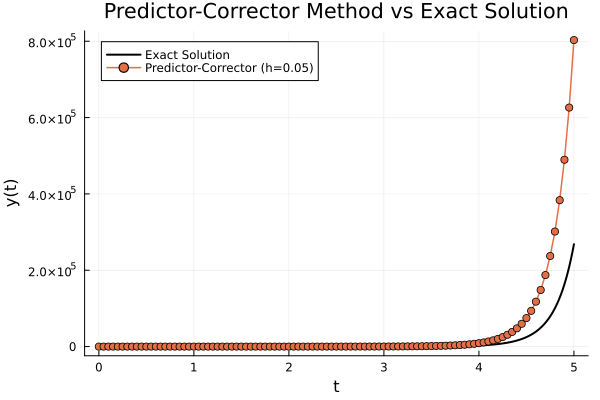

In [7]:
using Pkg; Pkg.add("Plots")
using Plots

# Define the differential equation y' = t*y + t^3
f(t, y) = t * y + t^3

# Define the exact solution (use external method or analytical)
exact_solution(t) = exp(t^2 / 2) - t^3 - 3t

# Trapezoid method for initialization
function trapezoidmethod(f, t0, y0, h)
    y1 = y0 + h * f(t0, y0) / 2
    return y1
end

# Adams-Bashforth Four-Step Method (predictor)
function adams_bashforth(y, f_vals, h)
    return y + h / 24 * (55 * f_vals[end] - 59 * f_vals[end-1] + 37 * f_vals[end-2] - 9 * f_vals[end-3])
end

# Adams-Moulton Three-Step Method (corrector)
function adams_moulton(y, f_vals, h, f_next)
    return y + h / 24 * (9 * f_next + 19 * f_vals[end] - 5 * f_vals[end-1] + f_vals[end-2])
end

# Predictor-Corrector Method
function predictor_corrector(f, t0, y0, h, n_steps)
    t = t0:h:(t0 + n_steps * h)  # Time steps
    y = zeros(length(t))         # Initialize solution
    f_vals = zeros(4)            # Initialize storage for function values

    # Initial values using trapezoid method
    y[1] = y0
    for i in 1:3
        y[i+1] = trapezoidmethod(f, t[i], y[i], h)
        f_vals[i] = f(t[i], y[i])
    end
    f_vals[4] = f(t[4], y[4])

    # Predictor-Corrector steps
    for i in 4:(length(t)-1)
        # Predict using Adams-Bashforth
        y_predict = adams_bashforth(y[i], f_vals, h)
        # Correct using Adams-Moulton
        f_predict = f(t[i+1], y_predict)
        y[i+1] = adams_moulton(y[i], f_vals, h, f_predict)

        # Update function values
        f_vals = vcat(f_vals[2:4], f(t[i+1], y[i+1]))
    end

    return t, y
end

# Parameters
t0 = 0.0
y0 = 1.0
h = 0.05
n_steps = Int(5 / h)

# Solve the differential equation
t, y_numerical = predictor_corrector(f, t0, y0, h, n_steps)

# Exact solution
t_exact = 0:0.01:5
y_exact = exact_solution.(t_exact)

# Plot the results
plot(t_exact, y_exact, label="Exact Solution", color=:black, lw=2, xlabel="t", ylabel="y(t)", title="Predictor-Corrector Method vs Exact Solution")
display(plot!(t, y_numerical, label="Predictor-Corrector (h=0.05)", marker=:circle, lw=1.5))

# Display the plot



Assignment 3

For each linear BVP, use (or modify) the finite element code provided to solve the problem and plot the solution 
for $n=40$. Then for each $n=10, 20, 40, \ldots, 640$, compute the norm of the error. Make a log-log convergence 
plot of error versus $n$ and compare graphically to second-order convergence.

(a) $-u''+u=-8+16x^2-x^4$; $u(0)=u(2)=0$
        
Exact solution: $x^2(4-x^2)$
        
(b) $u''+ x (u'+u) = -x[4 \sin (x) + 5 x \cos (x)]$, $u(0)=u(2\pi)=0$
        
Exact solution: $-x^2 \sin(x)$

   Resolving package versions...
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\BaboJ\.julia\environments\v1.11\Manifest.toml`


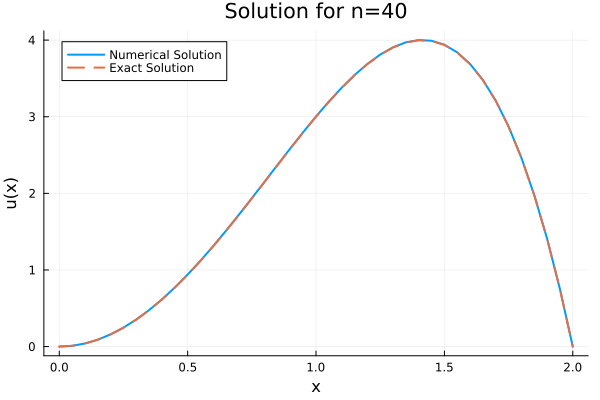

Norm of the error for n=40: 0.014350599077134428


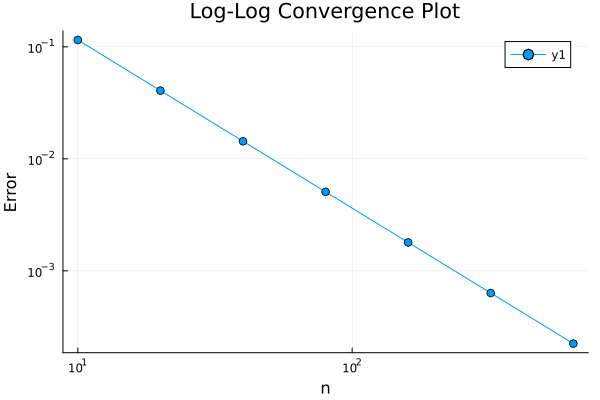

In [4]:
# 3a)
using Pkg; Pkg.add("LinearAlgebra")
using LinearAlgebra
using Plots

# Define the functions
c(x) = 1.0
s(x) = 1.0
f(x) = -8 + 16x^2 - x^4
u_exact(x) = x^2 * (4 - x^2)

# Define the domain
a, b = 0.0, 2.0

# FEM function (from the provided code)
function fem(c, s, f, a, b, n)
    h = (b - a) / n
    x = a:h:b

    Ke = [1 -1; -1 1]
    Me = (1/6) * [2 1; 1 2]
    fe = (1/2) * [1; 1]

    cval = c.(x)
    cbar = (cval[1:end-1] + cval[2:end]) / 2
    sval = s.(x)
    sbar = (sval[1:end-1] + sval[2:end]) / 2
    fval = f.(x)
    fbar = (fval[1:end-1] + fval[2:end]) / 2

    K = zeros(n-1, n-1)
    M = zeros(n-1, n-1)
    f = zeros(n-1)

    K[1, 1] = cbar[1] / h
    M[1, 1] = sbar[1] * h / 3
    f[1] = fbar[1] * h / 2

    K[n-1, n-1] = cbar[n] / h
    M[n-1, n-1] = sbar[n] * h / 3
    f[n-1] = fbar[n] * h / 2

    for k in 2:n-1
        K[k-1:k, k-1:k] += (cbar[k] / h) * Ke
        M[k-1:k, k-1:k] += (sbar[k] * h) * Me
        f[k-1:k] += (fbar[k] * h) * fe
    end

    u = (K + M) \ f
    return x, [0; u; 0]
end

# Solve for different values of n
ns = [10, 20, 40, 80, 160, 320, 640]
errors = Float64[]

for n in ns
    x, u_numerical = fem(c, s, f, a, b, n)
    u_exact_vals = u_exact.(x)
    error = norm(u_exact_vals - u_numerical, 2)
    push!(errors, error)
end

n = 40
x_40, u_numerical_40 = fem(c, s, f, a, b, n)

# Exact solution
u_exact_vals_40 = u_exact.(x_40)

# Plot the numerical and exact solutions
plot(x_40, u_numerical_40, label="Numerical Solution", linewidth=2)
display(plot!(x_40, u_exact_vals_40, label="Exact Solution", linestyle=:dash, linewidth=2, xlabel="x", ylabel="u(x)", title="Solution for n=40"))

# Compute the norm of the error
error_40 = norm(u_exact_vals_40 - u_numerical_40, 2)
println("Norm of the error for n=40: $error_40")

# Log-log plot of error versus n
plot(ns, errors, xscale=:log10, yscale=:log10, marker=:o,
     xlabel="n", ylabel="Error", title="Log-Log Convergence Plot")

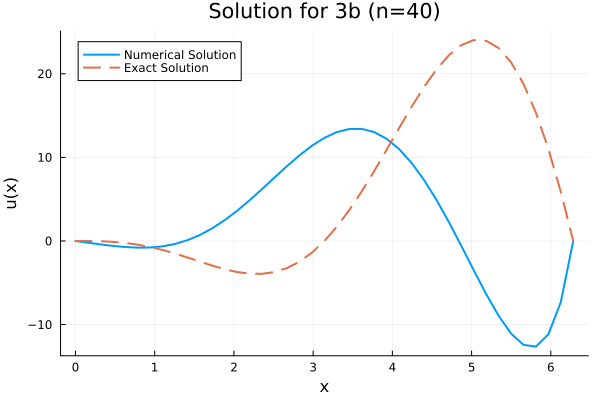

Norm of the error for n=40 (3b): 94.46854987316127


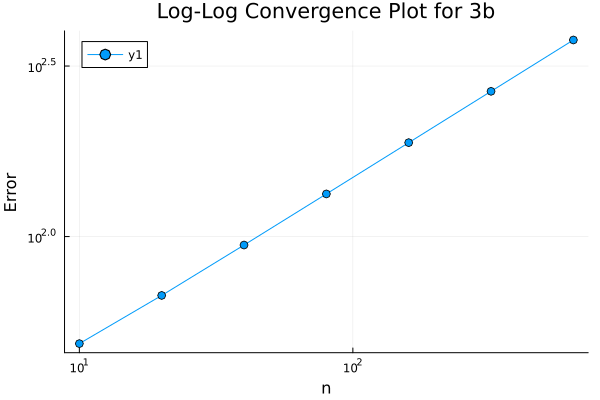

In [9]:
# 3b)
using Plots

# Define the functions for 3b
c(x) = 1.0
s(x) = x
f(x) = -x * (4sin(x) + 5x*cos(x))
u_exact(x) = -x^2 * sin(x)

# Define the domain
a, b = 0.0, 2pi

# Solve for different values of n and compute errors
ns = [10, 20, 40, 80, 160, 320, 640]
errors = Float64[]

for n in ns
    x, u_numerical = fem(c, s, f, a, b, n)
    u_exact_vals = u_exact.(x)
    error = norm(u_exact_vals - u_numerical, 2)
    push!(errors, error)
end

# Log-log plot of error versus n
plot(ns, errors, xscale=:log10, yscale=:log10, marker=:o,
     xlabel="n", ylabel="Error", title="Log-Log Convergence Plot for 3b")

# Solve for n = 40 and plot the solution
n = 40
x_40, u_numerical_40 = fem(c, s, f, a, b, n)
u_exact_vals_40 = u_exact.(x_40)

# Plot the numerical and exact solutions for n = 40
plot(x_40, u_numerical_40, label="Numerical Solution", linewidth=2)
display(plot!(x_40, u_exact_vals_40, label="Exact Solution", linestyle=:dash, linewidth=2,
      xlabel="x", ylabel="u(x)", title="Solution for 3b (n=40)"))

# Compute the norm of the error for n = 40
error_40 = norm(u_exact_vals_40 - u_numerical_40, 2)
println("Norm of the error for n=40 (3b): $error_40")

ns = [10, 20, 40, 80, 160, 320, 640]
errors = Float64[]

for n in ns
    x, u_numerical = fem(c, s, f, a, b, n)
    u_exact_vals = u_exact.(x)
    error = norm(u_exact_vals - u_numerical, 2)
    push!(errors, error)
end

plot(ns, errors, xscale=:log10, yscale=:log10, marker=:o,
     xlabel="n", ylabel="Error", title="Log-Log Convergence Plot for 3b")



Assignment 4

For each linear BVP, use the finite element code provided to solve the problem and plot the solution 
for $n=40$. Then for each $n=10, 20, 40, \ldots, 640$, compute the norm of the error. Make a log-log convergence 
plot of error versus $n$ and compare graphically to second-order convergence.

(a) $-u''+u=-8+16x^2-x^4$; $u(0)=u(2)=0$
        
Exact solution: $x^2(4-x^2)$
        
(b) $[(2+x) u']'+ 11 x u = -e^x(12 x^3 +7 x^2 +1)$, $u(-1)=u(1)=0$
        
Exact solution: $e^x(1-x^2)$
        
(c) $u''+ x (u'+u) = -x[4 \sin (x) + 5 x \cos (x)]$, $u(0)=u(2\pi)=0$
        
Exact solution: $-x^2 \sin(x)$


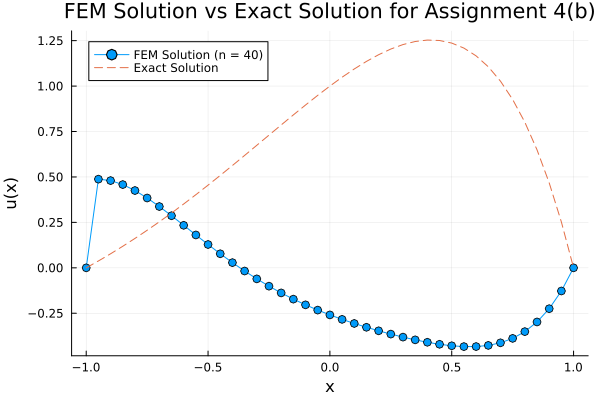

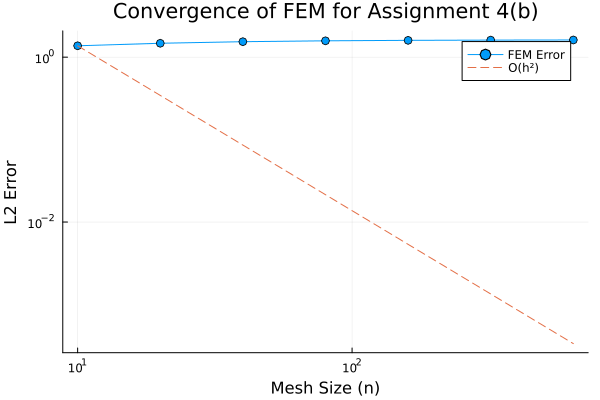

In [82]:
# Coefficient functions
function c(x)
    return 2 + x  # Coefficient of u'
end

function s(x)
    return 11x  # Coefficient of u
end

function f(x)
    return -exp(x) * (12x^3 + 7x^2 + 1)  # Right-hand side function
end

# Exact solution
function exact_solution_b(x)
    return exp(x) * (1 - x^2)
end

a, b = -1.0, 1.0  # Domain [-1, 1]
n = 40  # Number of elements for initial solution
x, u_fem = fem(c, s, f, a, b, n)  # Solve using FEM
u_exact = exact_solution_b.(x)  # Compute exact solution at grid points

# Plot the solution
plot(x, u_fem, label="FEM Solution (n = 40)", marker=:o)
plot!(x, u_exact, label="Exact Solution", linestyle=:dash)
xlabel!("x")
ylabel!("u(x)")
display(title!("FEM Solution vs Exact Solution for Assignment 4(b)"))

errors = []  # Store errors
mesh_sizes = Int[]  # Store mesh sizes

for n in [10, 20, 40, 80, 160, 320, 640]
    x, u_fem = fem(c, s, f, a, b, n)  # Solve using FEM
    u_exact = exact_solution_b.(x)  # Exact solution
    h = (b - a) / n  # Mesh size
    error = sqrt(h * sum((u_fem .- u_exact).^2))  # Compute L2-norm of the error
    push!(errors, error)
    push!(mesh_sizes, n)
end

# Plot the convergence
plot(mesh_sizes, errors, xscale=:log10, yscale=:log10, marker=:o, label="FEM Error")
plot!(mesh_sizes, errors[1] .* (mesh_sizes[1] ./ mesh_sizes).^2, label="O(h²)", linestyle=:dash)
xlabel!("Mesh Size (n)")
ylabel!("L2 Error")
display(title!("Convergence of FEM for Assignment 4(b)"))

